**Exercici 1**  

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades.  
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uefa = pd.read_csv('Lligues europees UEFA.csv', encoding = 'latin-1', sep = ';')
pd.set_option('display.max_columns',25)
print(uefa.shape)
uefa.head()

(98, 21)


,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


**Nombre de las columnas:** 

Rk = Ranking  
Squad = Team squad  
Country  
LgRk = League Ranking  
MP = Match played  
W = Wins  
D = Draws  
L = Lost  
GF = Goals favor  
GA = Goals against  
GD = Goals difference  
Pts = Points  
Pts/G = Points/game  
xG = Expected goals  
xGA = Expected goals against  
xGD = Expected goals difference =(Expected goals-expected goals against)  
xGD/90 = number of expected goals from one or several players in 90 minutes  
Last 5 = Last 5 results  
Attendance = (Assistencia)  
Top Team Scorer  
Goalkeeper  

In [4]:
uefa.info()
# No hay nulos (98 non-null en todos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [5]:
uefa.loc[uefa.duplicated()].count()
# No existen duplicados

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [6]:
round(uefa.describe(), 2).T

,count,mean,std,min,25%,50%,75%,max
Rk,98.0,49.50,28.43,1.00,25.25,49.50,73.75,98.00
LgRk,98.0,10.32,5.71,1.00,5.25,10.00,15.00,20.00
MP,98.0,36.31,1.15,34.00,36.00,37.00,37.00,37.00
W,98.0,13.45,5.75,3.00,9.00,13.00,17.00,28.00
D,98.0,9.41,2.90,3.00,7.00,9.00,11.00,16.00
L,98.0,13.45,5.12,2.00,10.00,13.00,17.00,26.00
GF,98.0,50.88,16.10,23.00,39.00,47.00,60.00,97.00
GA,98.0,50.88,13.63,24.00,40.00,50.00,59.00,89.00
GD,98.0,0.00,26.50,-56.00,-17.75,-1.00,17.25,72.00
Pts,98.0,49.73,16.17,18.00,37.00,46.00,61.75,90.00


In [7]:
uefa.describe(include = 'O').T

,count,unique,top,freq
Squad,98,98,Manchester City,1
Country,98,5,ENG,20
Last 5,98,80,W W W L L,4
Top Team Scorer,98,98,Kevin De Bruyne - 15,1
Goalkeeper,98,98,Ederson,1


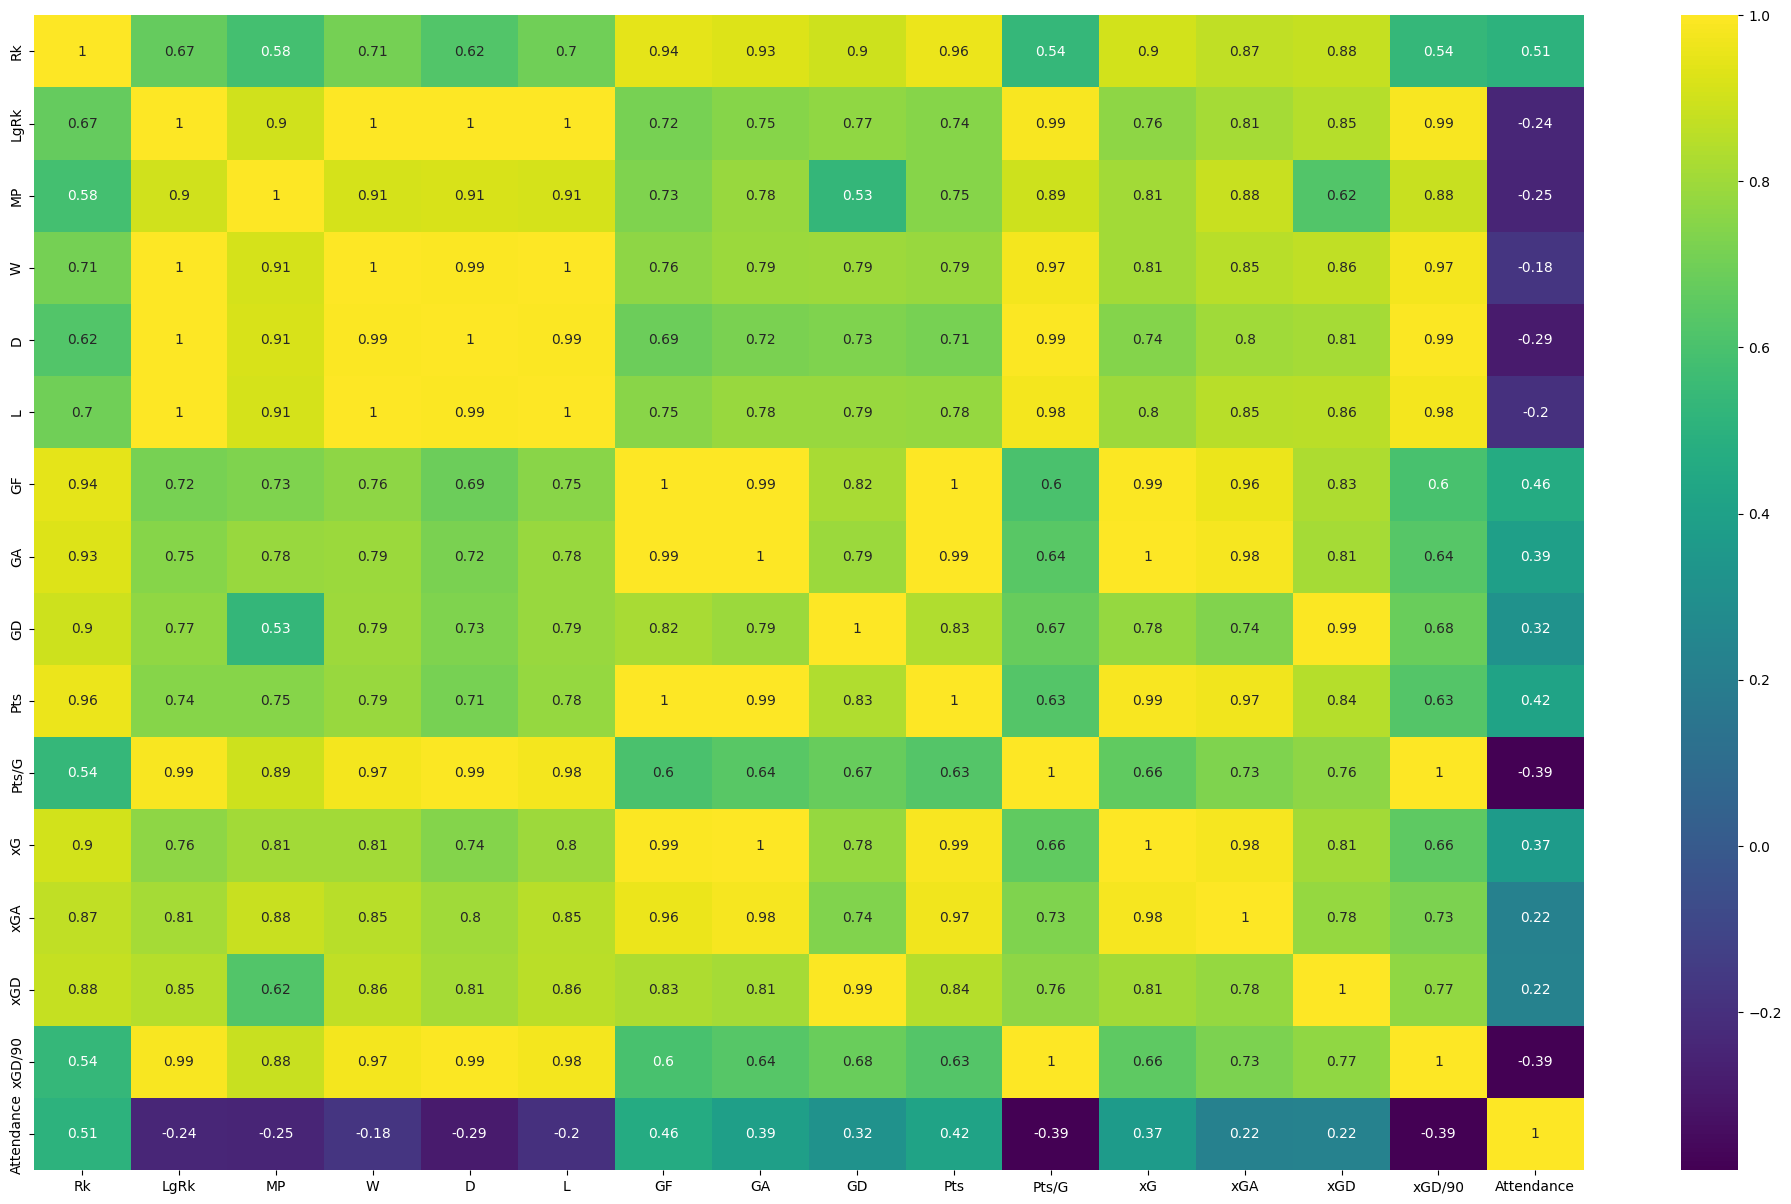

In [8]:
plt.figure(figsize=(25,15))
sns.heatmap(uefa.describe().corr(),annot = True, cmap ='viridis')
plt.show()

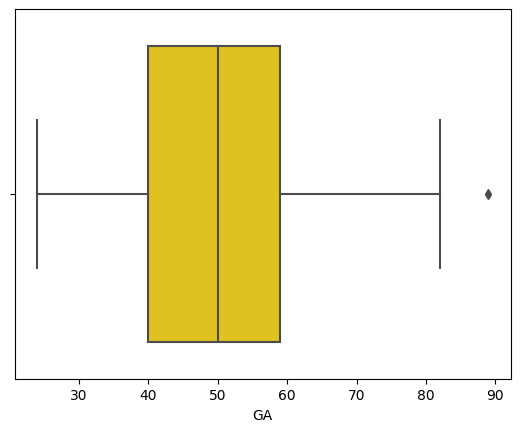

In [9]:
sns.boxplot(data = uefa, x = 'GA', color = 'gold');

Representación de los Goles en contra, donde existe un outlier.

In [11]:
uefa.groupby(uefa['Country'])['GA'].sum()

Country
ENG    1018
ESP     930
FRA    1030
GER     954
ITA    1054
Name: GA, dtype: int64

Para ver si los Goles en contra siguen una distribución normal, se realiza la **prueba de Shapiro-Wilk**.  
Planteamos las hipótesis:  
- **Hipótesis Nula (h0):** Los Goles en Contra siguen una distribución normal.
- **Hipotesis Alternativa (h1):** La distribución de los datos, siguen otro tipo de distribución.

In [12]:
# Test de Normalidad Shapiro-Wilk:

from scipy.stats import shapiro
data = uefa['GA']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente sea Normal')
else:
    print('Probablemente no sea Normal')

stat=0.983, p=0.243
Probablemente sea Normal


- Como **p = 0.243** (Y por lo tanto mayor que el grado de significancia escogido: 0.05) No hay suficiente evidencia para descartar la hipotesis Nula.  
Probablemente los datos sigan una **distribución Normal** (Gaussiana).
- En cuanto a **stat = 0.983**, indica la magnitud de la desviacion con respecto a la distribucion normal. Al ser muy cercano a 1, tiene un alto nivel de coincidencia con la distribución Gaussiana.

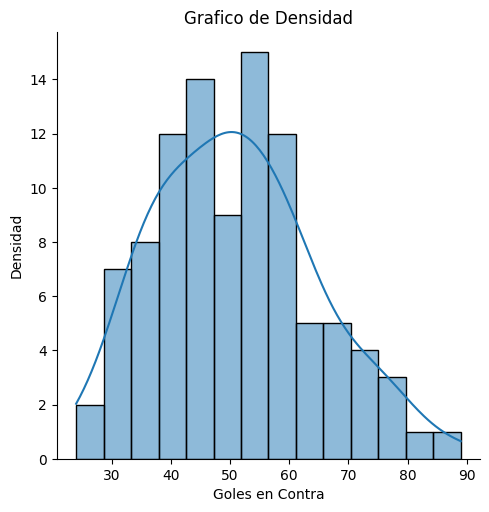

In [13]:
sns.displot(uefa['GA'],bins = 14, kde = True)

plt.xlabel('Goles en Contra')
plt.ylabel('Densidad')
plt.title('Grafico de Densidad')
plt.show();


Representamos los datos como otra manera de comprobar la distribución de los datos.

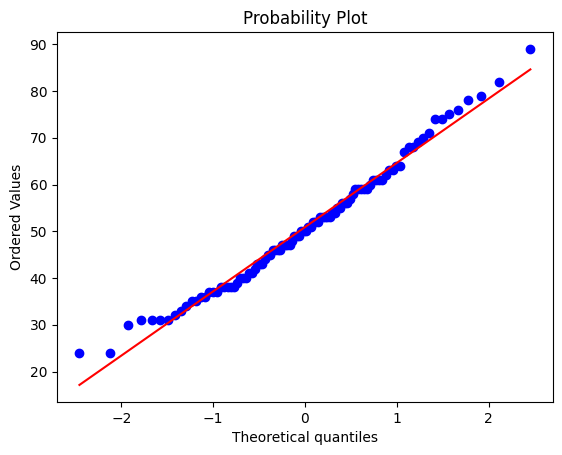

In [14]:
from scipy.stats import probplot

probplot(uefa['GA'], dist='norm', plot = plt)
plt.show()

Comolos valores observados se ajustan aproximadamente a la línea recta en el gráfico de probabilidad, indica que los datos se ajustan a la distribución teórica (en este caso la Normal).

Como existe un **valor atipico:** probamos con una prueba más robusta como Prueba de normalidad de **Anderson-Darling** para ver si cambia mucho:

In [15]:
# Test de Normalidad Anderson-Darling:
from scipy.stats import anderson
data = uefa['GA']
result = anderson(data)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probablemente Gaussiane en un nivel del %.1f%% ' % (sl))
    else:
        print('Probablemente no Gaussiana en un nivel del %.1f%% ' % (sl))

stat=0.404
Probablemente Gaussiane en un nivel del 15.0% 
Probablemente Gaussiane en un nivel del 10.0% 
Probablemente Gaussiane en un nivel del 5.0% 
Probablemente Gaussiane en un nivel del 2.5% 
Probablemente Gaussiane en un nivel del 1.0% 


El resultado es también que los datos se ditribuyen de manera Gaussiana a todos los niveles de Significancia.

**Exercici 2**  
  
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades.  
Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Buscaremos si existe una relación entre los **partidos empatados (D)** y la **posición en la liga (LgRk)**.  
Así pues, estableceremos las hipótesis de la siguiente manera:
- **Hipotesis Nula (h0):** Son variables independientes. El número de partidos empatados no influye en la posición del equipo en la liga.  
- **Hipótesis Alternativa (h1):** Existe algún tipo de relación entre ambas variables. La posición en la liga dependeen alguna manera de los partidos empatados.    

Suposiciones para el test de correlación de Pearson son:
- Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).
- Las observaciones en cada muestra se distribuyen normalmente.
- Las observaciones en cada muestra tienen la misma varianza.

Comprobamos que ambas muestras se distribuyan normalmente mediante el test de Shapiro-Wilk:

In [16]:
# Test de Normalidad Shapiro-Wilk Para los Partidos Empatados:

from scipy.stats import shapiro
data = uefa['D']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente sea Normal')
else:
    print('Probablemente no sea Normal')

stat=0.977, p=0.081
Probablemente sea Normal


In [17]:
# Test de Normalidad Shapiro-Wilk Para la Posición en la Liga:

from scipy.stats import shapiro
data = uefa['LgRk']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente sea Normal')
else:
    print('Probablemente no sea Normal')

stat=0.952, p=0.001
Probablemente no sea Normal


No Cumple las suposiciones para el test de Correlación de Pearson, dado que la distribución de la posición en la liga no sigue una distribución Gaussiana.  
Buscamos otro test que nos confirme si existe correlación entre ambas variables. En este caso el **test de correlación de Spearman**, cuyas suposiciones sí se cumplen:
- Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).
- Las observaciones en cada muestra se pueden clasificar.

Establecemos las hipótesis para el test de Spearman:
- **Hipótesis Nula (H0)**: Las dos muestras son independientes.
- **Hipótesis Alternativa (H1)**: Existe un correlación entre ambas muestras.

In [18]:
# Test de correlación de Spearman:

from scipy.stats import spearmanr
data1 = uefa['D']
data2 = uefa['LgRk']
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente independiente')
else:
    print('Probablemente dependiente')

stat=0.312, p=0.002
Probablemente dependiente


- Como **p = 0.002** (Y por lo tanto menor que el grado de significancia escogido: 0.05) Existe suficiente evidencia para descartar la hipotesis Nula.  
Probablemente exista una correlación entre las dos muestras.
- En cuanto a **stat = 0.312**, indica que esa correlación no será muy relevante, ya que no es un valor cercano a 1. Al ser un valor positivo, se trata de una correlacion positiva (aunque debil), Es decir a mayor número de partidos empatadosmayor será el valor de posición en la liga (Es decir peor posicionado).

Los puntos en la liga son: 0 si se pierde, 1 si se empata y 3 si se gana (se cambió de 2 a 3 para forzar a los equipos a jugar de manera más ofensiva y entretenida para el público). Según el test, el objetivo se cumple sin distornsionar demasiado, ya que a la larga, los equipos que busquen empatar, pueden ver perjudicada *levemente* su posición en la liga.

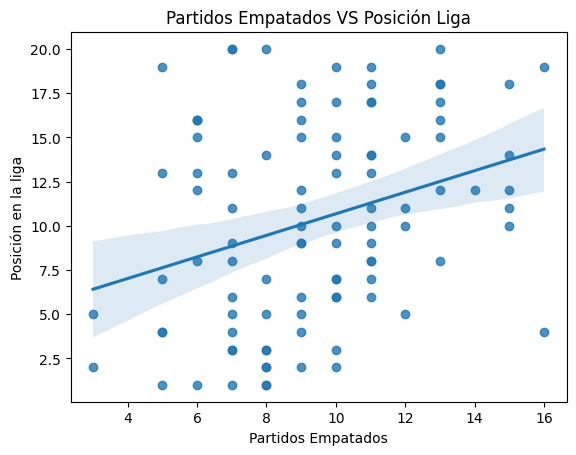

In [19]:
sns.regplot(x='D', y='LgRk', data=uefa)
plt.xlabel('Partidos Empatados')
plt.ylabel('Posición en la liga')
plt.title('Partidos Empatados VS Posición Liga')
plt.show()


Representando gráficamente, no parece que exista una relación lineal entre el número de partidos empatados y la posición final que se ocupa en la liga.  
Tendría sentido ya que que el hecho de que un equipo tenga pocos partidos empatados, podría deberse tanto a que ha ganado muchos partidos como a que ha perdido muchos.  
(Nota: *No sabría como establecer qué tipo de correlación es, si no es una correlación lineal*)

**Exercici 3**  
  
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades.  
Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

**Nombre de las columnas:** 

Rk = Ranking  
Squad = Team squad  
Country  
LgRk = League Ranking 
MP = Match played  
W = Wins  
D = Draws  
L = Lost  
GF = Goals favor  
GA = Goals against  
GD = Goals difference  
Pts = Points  
Pts/G = Points/game  
xG = Expected goals  
xGA = Expected goals against  
xGD = Expected goals difference =(Expected goals-expected goals against)  
xGD/90 = number of expected goals from one or several players in 90 minutes  
Last 5 = Last 5 results  
Attendance = (Assistencia)  
Top Team Scorer  
Goalkeeper  

Para comprobar si unas ligas son más ofensivas que otras, seleccionaremos los goles a favor pero filtrando por paises.  
He seleccionado los equipos de España, Italia e Inglaterra y aplicaremos el **Test de Analisis de la varianza (ANOVA)** para comprobar si existen variaciones significantes entre las diferentes muestras.

Las suposiciones para el tes de ANOVA son:
- Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).
- Las observaciones en cada muestra se distribuyen normalmente.
- Las observaciones en cada muestra tienen la misma varianza.



Lo primero es seleccionar las muestras. Es decir los Goles a Favor de los equipos de España, Italia e Inglaterra:

In [22]:
GolFa_Esp = uefa[uefa['Country'] == 'ESP']
GolFa_Ita = uefa[uefa['Country'] == 'ITA']
GolFa_Eng = uefa[uefa['Country'] == 'ENG']

# GFEsp = GolFa_Esp['GF']
# GFIta = GolFa_Ita['GF']
# GFEng = GolFa_Eng['GF']

Testeamos si las muestras se distribuyen normalmente, para poder aplicar el test ANOVA.  
Igual que anteriormente lo hacemos mediante el **test Shapiro-Wilk**:

In [23]:
# Test de Normalidad Shapiro-Wilk:

from scipy.stats import shapiro
data = GolFa_Esp['GF']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente sea Normal')
else:
    print('Probablemente no sea Normal')

stat=0.888, p=0.025
Probablemente no sea Normal


In [24]:
# Test de Normalidad Shapiro-Wilk:

from scipy.stats import shapiro
data = GolFa_Ita['GF']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente sea Normal')
else:
    print('Probablemente no sea Normal')

stat=0.972, p=0.787
Probablemente sea Normal


In [25]:
# Test de Normalidad Shapiro-Wilk:

from scipy.stats import shapiro
data = GolFa_Eng['GF']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probablemente sea Normal')
else:
    print('Probablemente no sea Normal')

stat=0.913, p=0.074
Probablemente sea Normal


El resultado es que una de las mustras no sigue una distribución Gaussiana, por lo que no podemos aplicar el test de ANOVA.  
Aplicaremos entonces el Test **Kruskal-Wallis H** cuyas suposiciones sí cumplen las muestras:
- Las observaciones en cada muestra son independientes e idénticamente distribuidas (iid).
- Las observaciones en cada muestra se pueden clasificar.

Establecemos las hipótesis:
- **Hipótesis Nula (h0):** Las distribuciones de las muestras son iguales.
- **Hipótesis Alternativa (H1):** Las distribuciones son diferentes.

In [26]:
# Test de Wilcoxon Signed-Rank:

from scipy.stats import wilcoxon
data1 = GolFa_Esp['GF']
data2 = GolFa_Ita['GF']
data3 = GolFa_Eng['GF']
stat1, p1 = wilcoxon(data1, data2)
stat2, p2 = wilcoxon(data1, data3)
stat3, p3 = wilcoxon(data2, data3)
print('stat1=%.3f, p1=%.3f' % (stat1, p1))
print('stat2=%.3f, p2=%.3f' % (stat2, p2))
print('stat3=%.3f, p3=%.3f' % (stat3, p3))
#if (p1 and p2 and p3) > 0.05:
if (p1 > 0.05) and (p2 > 0.05) and (p3 > 0.05):
    print('Probablemente la misma distribución')
else:
    print('Probablemente diferentes distribuciones')

stat1=39.500, p1=0.025
stat2=58.000, p2=0.083
stat3=75.000, p3=0.421
Probablemente diferentes distribuciones


/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


El test nos da como resultado que las distribuciones de las muestras son diferentes.  
Al representarlo gráficamente se puede observar que la muestra de Inglaterra tiene una cola mayor por la derecha, lo que supondría mayor numero de observaciones donde los goles a favor son de mayor valor que en las otras dos muestras.  
Podríamos concluir que los equipos en Inglaterra juegan de manera un poco más ofensiva.

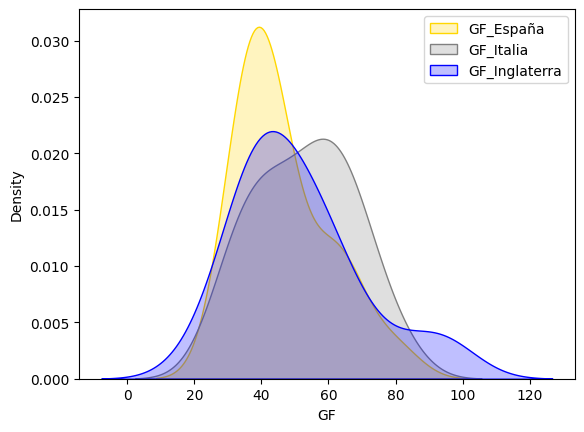

In [28]:
sns.kdeplot(GolFa_Esp['GF'], label= 'GF_España', color= 'gold', fill = True)
sns.kdeplot(GolFa_Ita['GF'], label= 'GF_Italia', color= 'grey', fill = True)
sns.kdeplot(GolFa_Eng['GF'], label= 'GF_Inglaterra', color= 'blue', fill = True)
plt.legend()
plt.show()
